In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

In [4]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy];

Requirement already up-to-date: rasa_core==0.9.6 in /usr/local/lib/python3.6/dist-packages (0.9.6)
Requirement already up-to-date: rasa_nlu[spacy] in /usr/local/lib/python3.6/dist-packages (0.15.0)


In [5]:
!{python} -m spacy download en_core_web_md

     |████████████████████████████████| 120.9MB 58.6MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-e9i3e57q/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [6]:
!{python} -m spacy link en_core_web_md en --force;


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
import rasa_nlu
import rasa_core
import spacy

In [8]:
nlu_md = """
{
  "rasa_nlu_data": {
    "common_examples": [
      {
        "text": "hello",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hi",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "How's the weather today in Berlin?",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 27,
            "end": 33,
            "value": "Berlin",
            "entity": "location"
          }
        ]
      },
      {
        "text": "hola",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hello, how are you today?",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "yo",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "How's weather in Stuttgart today?",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 17,
            "end": 26,
            "value": "Stuttgart",
            "entity": "location"
          }
        ]
      },
      {
        "text": "What's going on Berlin today?",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 16,
            "end": 22,
            "value": "Berlin",
            "entity": "location"
          }
        ]
      },
      {
        "text": "bye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "see ya",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "cya",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "How's the weather today?",
        "intent": "ask_weather",
        "entities": []
      },
      {
        "text": "What's today's weather?",
        "intent": "ask_weather",
        "entities": []
      },
      {
        "text": "How is it out there today?",
        "intent": "ask_weather",
        "entities": []
      },
      {
        "text": "In Prague",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 3,
            "end": 9,
            "value": "Prague",
            "entity": "location"
          }
        ]
      },
      {
        "text": "at Budapest",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 3,
            "end": 11,
            "value": "Budapest",
            "entity": "location"
          }
        ]
      },
      {
        "text": "What is the temp in Stuttgart?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 20,
            "end": 29,
            "value": "Stuttgart",
            "entity": "location"
          }
        ]
      },
      {
        "text": "How is the temperature in Amsterdam now?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 26,
            "end": 35,
            "value": "Amsterdam",
            "entity": "location"
          }
        ]
      },
      {
        "text": "What is temperature in New York now?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 23,
            "end": 31,
            "value": "New York",
            "entity": "location"
          }
        ]
      },
      {
        "text": "How's current temperature in Moscow now?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 29,
            "end": 35,
            "value": "Moscow",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Tell me temperature in Helsinki now.",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 23,
            "end": 31,
            "value": "Helsinki",
            "entity": "location"
          }
        ]
      },
      {
        "text": "What's overall weather today?",
        "intent": "ask_weather",
        "entities": []
      },
      {
        "text": "Tell me today's weather",
        "intent": "ask_weather",
        "entities": []
      },
      {
        "text": "See you later",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "Good bye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "Nancy",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 0,
            "end": 5,
            "value": "Nancy",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Tell me weather of Dresden",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 19,
            "end": 26,
            "value": "Dresden",
            "entity": "location"
          }
        ]
      },
      {
        "text": "What about in Rome today?",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 14,
            "end": 18,
            "value": "Rome",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Show me weather of Venice",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 19,
            "end": 25,
            "value": "Venice",
            "entity": "location"
          }
        ]
      },
      {
        "text": "How about weather in Italy",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 21,
            "end": 26,
            "value": "Italy",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Sorry, in Vatican",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 10,
            "end": 17,
            "value": "Vatican",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Uhh, how about in Bulgaria?",
        "intent": "ask_weather_location",
        "entities": [
          {
            "start": 18,
            "end": 26,
            "value": "Bulgaria",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Tell the temperature in Caen",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 24,
            "end": 28,
            "value": "Caen",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Temp in Calgary?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 8,
            "end": 15,
            "value": "Calgary",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Current temperature in London?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 23,
            "end": 29,
            "value": "London",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Show the temp in UK?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 17,
            "end": 19,
            "value": "UK",
            "entity": "location"
          }
        ]
      },
      {
        "text": "what about today's temperature in Munich?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 34,
            "end": 40,
            "value": "Munich",
            "entity": "location"
          }
        ]
      },
      {
        "text": "hey, what's current temp in budapest?",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 28,
            "end": 36,
            "value": "budapest",
            "entity": "location"
          }
        ]
      },
      {
        "text": "show me current canada temperature",
        "intent": "ask_temperature",
        "entities": [
          {
            "start": 16,
            "end": 22,
            "value": "canada",
            "entity": "location"
          }
        ]
      },
      {
        "text": "hiya",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hello there",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "Umm, hey",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "bye then",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "okay, thanks, cya ",
        "intent": "goodbye",
        "entities": []
      }
    ]
  }
}

"""

%store nlu_md > nlu_data.md

Writing 'nlu_md' (str) to file 'nlu_data.md'.


In [9]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 
%store config > nlu-config.yml

Writing 'config' (str) to file 'nlu-config.yml'.


In [10]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu_data.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("nlu-config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu_data.md is rasa_nlu
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 44 (5 distinct intents)
	- Found intents: 'greet', 'ask_weather_location', 'ask_temperature', 'ask_weather', 'goodbye'
	- entity examples: 24 (1 distinct entities)
	- found entities: 'location'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
INFO:rasa_nlu.model:Starting to train component SpacyNLP
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyTokenizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component CRFEntityExtractor
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyFeaturizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to tra

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [11]:
# A helper function for prettier output
import json

def pprint(o):   
    print(json.dumps(o, indent=2))

pprint(interpreter.parse("mumbai"))

{
  "intent": {
    "name": "ask_weather_location",
    "confidence": 0.8728586292835353
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "ask_weather_location",
      "confidence": 0.8728586292835353
    },
    {
      "name": "greet",
      "confidence": 0.06302770824431399
    },
    {
      "name": "ask_temperature",
      "confidence": 0.057399549713125254
    },
    {
      "name": "ask_weather",
      "confidence": 0.0038818438926085212
    },
    {
      "name": "goodbye",
      "confidence": 0.002832268866416733
    }
  ],
  "text": "mumbai"
}


In [12]:
stories_md = """

## story 1
* greet
	- utter_greet

## story 2
* goodbye
	- utter_goodbye

## story 3
* ask_weather
	- utter_ask_location

## story 4
* ask_weather_location
	- action_weather

## story 5
* ask_temperature
	- action_temp
## Generated Story 1
* greet
    - utter_greet
* ask_weather_location{"location": "stuttgart"}
    - slot{"location": "stuttgart"}
    - action_weather
    - slot{"location": "stuttgart"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 2
* greet
    - utter_greet
* ask_weather
    - utter_ask_location
* ask_weather_location{"location": "berlin"}
    - slot{"location": "berlin"}
    - action_weather
    - slot{"location": "berlin"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 3
* greet
    - utter_greet
* ask_temperature{"location": "Oslo"}
    - slot{"location": "Oslo"}
    - action_temp
    - slot{"location": "Oslo"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 4
* greet
    - utter_greet
* ask_weather
    - utter_ask_location
* ask_weather_location{"location": "cologne"}
    - slot{"location": "cologne"}
    - action_weather
    - slot{"location": "cologne"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 5
* greet
    - utter_greet
* ask_weather
    - utter_ask_location
* ask_weather_location{"location": "Kiel"}
    - slot{"location": "Kiel"}
    - action_weather
    - slot{"location": "Kiel"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 6
* greet
    - utter_greet
* ask_weather_location{"location": "Jamaica"}
    - slot{"location": "Jamaica"}
    - action_weather
    - slot{"location": "Jamaica"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 7
* greet
    - utter_greet
* ask_weather
    - utter_ask_location
* ask_weather_location{"location": "dhaka"}
    - slot{"location": "dhaka"}
    - action_weather
    - slot{"location": "dhaka"}
    - utter_did_that_help
* ask_weather_location{"location": "Chittagang"}
    - slot{"location": "Chittagang"}
    - action_weather
    - slot{"location": "Chittagang"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 8
* greet
    - utter_greet
* ask_temperature{"location": "Frankfurt"}
    - slot{"location": "Frankfurt"}
    - action_temp
    - slot{"location": "Frankfurt"}
    - utter_did_that_help
* ask_temperature{"location": "Bonn"}
    - slot{"location": "Bonn"}
    - action_temp
    - slot{"location": "Bonn"}
    - utter_did_that_help
* goodbye
    - utter_goodbye

## Generated Story 9
* greet
    - utter_greet
* ask_weather
    - utter_ask_location
* ask_weather_location{"location": "hongkong"}
    - slot{"location": "hongkong"}
    - action_weather
    - utter_did_that_help

    
"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [13]:
domain_yml = """
slots:
  location:
    type: text


intents:
 - greet
 - goodbye
 - ask_weather
 - ask_weather_location
 - ask_temperature


entities:
 - location

templates:
  utter_greet:
    - 'Hello, What can I do for you?'
    - 'Hello!'
  utter_goodbye:
    - 'Bye'
    - 'See you soon'
  utter_ask_location:
    - 'In what location?'
    - 'Which area?'
    - 'Which city specifically?'
  utter_did_that_help:
    - text: "Did that help you?"

actions:
 - utter_greet
 - utter_goodbye
 - utter_ask_location
 - __main__.ActionWeather
 - __main__.ActionTemperature
 - utter_did_that_help
    
  
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
import requests
import random

'''Get "action_weather" data'''
class ActionWeather(Action):
    def name(self):
        return 'action_weather'

    def run(self, dispatcher, tracker, domain):
        app_id = "JnnC8L7yA6ebC44rCiuj"
        app_key = "twQ8s3NiYo2MCBZfj1pZAQ"
        base_url = "https://weather.api.here.com/weather/1.0/report.json?" 
 
        location = tracker.get_slot('location')
        Final_url = base_url + "app_id=" + app_id + "&app_code=" + app_key + "&product=observation&name=" + location 
 
        weather_data = requests.get(Final_url).json()

        if (len(weather_data) > 2):
            # JSON data works just similar to python dictionary and you can access the value using [].
            current_temperature =  weather_data['observations']['location'][0]['observation'][0]['temperature']
            wind=weather_data['observations']['location'][0]['observation'][0]['windSpeed']
            desc=weather_data['observations']['location'][0]['observation'][0]['description']

            response = """ It is {} in {} at this moment. The temperature is {} degree and the wind speed is {} m/s. """. format(desc, location, current_temperature, wind)
            dispatcher.utter_message(response)
        else:
            dispatcher.utter_message("City Not Found ")
 

'''Get "action_temp" data'''
class ActionTemperature(Action):
    def name(self):
        return 'action_temp'
      
    def run(self, dispatcher, tracker, domain):
        app_id = "JnnC8L7yA6ebC44rCiuj"
        app_key = "twQ8s3NiYo2MCBZfj1pZAQ"
        base_url = "https://weather.api.here.com/weather/1.0/report.json?" 
 
        location = tracker.get_slot('location')
        Final_url = base_url + "app_id=" + app_id + "&app_code=" + app_key + "&product=observation&name=" + location 
 
        weather_data = requests.get(Final_url).json()

        if (len(weather_data) > 2):
            # JSON data works just similar to python dictionary and you can access the value using [].
            current_temperature =  weather_data['observations']['location'][0]['observation'][0]['temperature']

            response = """ The temperature in {} is now {} degree currently """. format(location, current_temperature)
            dispatcher.utter_message(response)
        else:
            dispatcher.utter_message("City Not Found ")  


In [15]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz

!{python} -m pip install pygraphviz;

Selecting previously unselected package libgtk2.0-common.
(Reading database ... 130911 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.32-1ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../1-libgtk2.0-0_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail18:amd64.
Preparing to unpack .../2-libgail18_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail18:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail-common:amd64.
Preparing to unpack .../3-libgail-common_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail-common:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libxdot4.
Preparing to unpack .../4-libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Prep

Processed Story Blocks: 100%|██████████| 14/14 [00:00<00:00, 481.65it/s, # trackers=1]


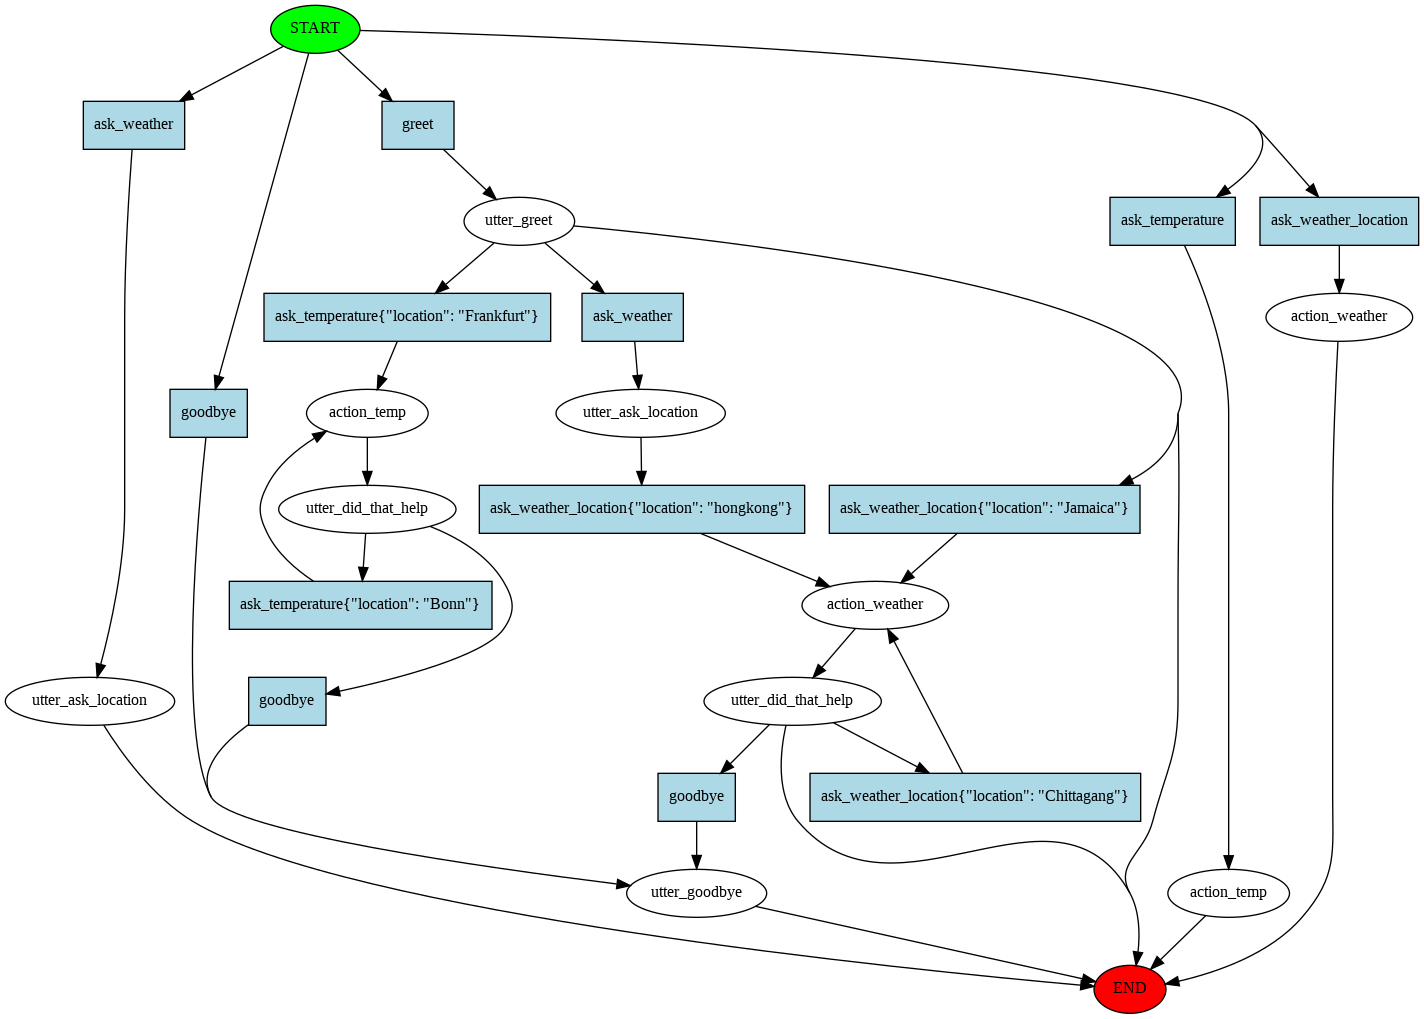

In [38]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")



In [17]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])


# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 14/14 [00:00<00:00, 55.84it/s, # trackers=15]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 404/404 [00:10<00:00, 36.95it/s, # actions=361]
INFO:rasa_core.featurizers:Created 361 action examples.
Processed actions: 361it [00:00, 536.47it/s, # examples=361]
INFO:rasa_core.policies.memoization:Memorized 361 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 404/404 [00:11<00:00, 27.54it/s, # actions=361]
INFO:rasa_core.featurizers:Created 361 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 361 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 15)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6144      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 6,408
Trainable params: 6,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
361/361 [==============================] - 1s 2ms/step - loss: 2.0139 - acc: 0.3158
Epoch 2/200
361/361 [==============================] - 0s 304us/step - loss: 1.9068 - acc: 0.4238
Epoch 3/200
361/361 [==============================] - 0s 222us/step - loss: 1

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


In [18]:
#Starting the Bot

from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.


In [24]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input("User: ")
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print("Robo: ",response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
User: hello
Robo:  Hello!
User: how's the weather
Robo:  Which area?
User: In mumbai
Robo:   It is Passing clouds. Hot. in mumbai at this moment. The temperature is 33.00 degree and the wind speed is 22.24 m/s. 
Robo:  Did that help you?
User: temp in kolkata
Robo:   The temperature in kolkata is now 35.61 degree currently 
Robo:  Did that help you?
User: yes
Robo:  Hello, What can I do for you?
User: bye
Robo:  Bye
User: stop
